## ***1. Objective:***
The below notebook encompasses an end-to-end clustering analysis aimed at assisting a running footwear and apparel company in making strategic decisions regarding their product offerings and marketing strategies. Leveraging a survey dataset, the primary focus is on identifying key consumer segments using unsupervised learning techniques, particularly K-means clustering. The analysis begins with data exploration, preprocessing, and the calculation of similarity metrics. The optimal number of clusters is determined through the Elbow method, and subsequent K-means clustering is performed. Visualization of the clustered data using Principal Component Analysis (PCA) provides a clear representation of consumer segments. The notebook concludes with an in-depth exploration of each cluster's characteristics and the calculation of similarity metrics for further insights. The ultimate goal is to offer actionable recommendations for product portfolio customization and personalized marketing strategies based on the identified consumer segments.


## 2. Worked Solo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset from Excel file
file_path = '/Users/himanshutalele/Desktop/projects/running-consumer-clustering/data/survey_data.xlsx'
df = pd.read_excel(file_path)


In [3]:
## 3. 
df

,record,id,United States,United Kingdom,Japan,Valid,Invalid,Male,Female,Under 18,...,I have no complaints!,They wear out too fast and I'm always having to buy new ones.,They feel too narrow for my feet.,They are too heavy.,They feel great but don't feel fashionable.,Anything bright & bold,"Soft pastels - pink, coral, purple","Earth tones - greens, yellows, browns",Neutrals - black & white,"Something normal, no strong preference"
0,1,9731743,1,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
1,2,5917428,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3,2459391,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,1,0,0
3,4,3277896,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,5,4986375,1,0,0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,171,4436816,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
171,172,2124150,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
172,173,1218187,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
173,174,5498558,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


- 'record' and 'id' columns in the clustering process may not provide meaningful insights as they typically represent unique identifiers for each record and individual. 
- Clustering is often performed based on the features that describe the characteristics of the data points rather than unique identifiers.
- Including them in the clustering process might lead the algorithm to assign clusters based on these identifiers, which may not be meaningful for your analysis.

In [4]:
# Extract 'record' and 'id' columns and drop them from the main dataframe
record_id_df = df[['record', 'id']]
df = df.drop(['record', 'id'], axis=1)

In [5]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [6]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

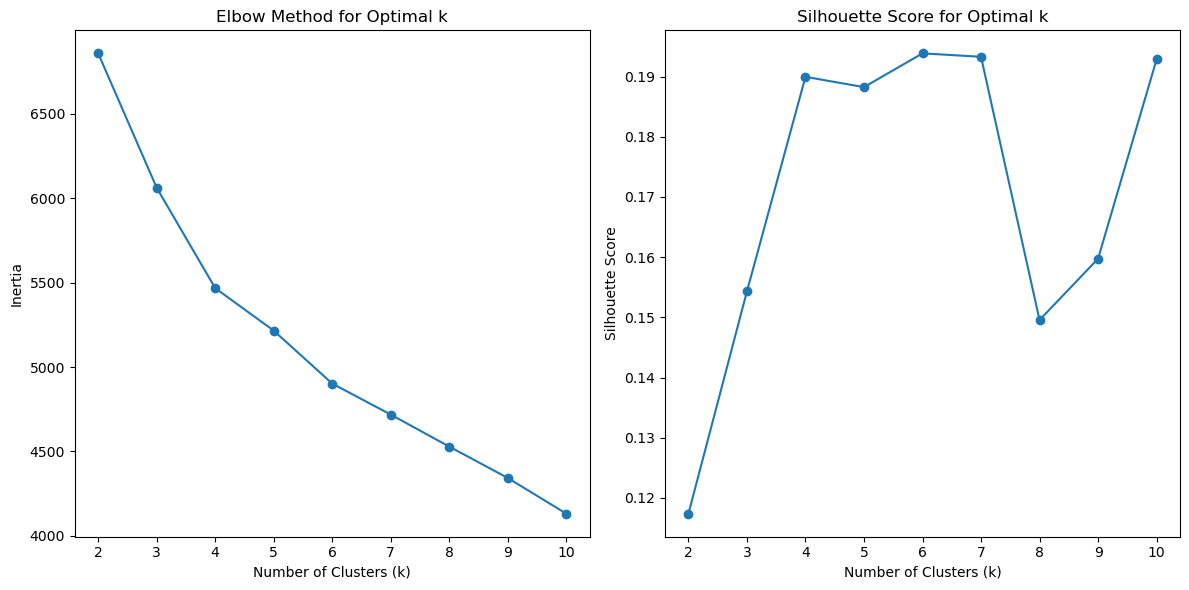

In [7]:
# Plot the Elbow method results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

The Elbow method is a heuristic technique used to find the optimal number of clusters in a dataset. The idea is to iteratively increase the number of clusters and calculate a measure of the resulting clusters' quality. In this case, we are using the Silhouette Score, which measures how similar an object is to its own cluster compared to other clusters.

In our case, the elbow is found to be at 5 clusters. This means that, when we partition the dataset into 5 clusters, we achieve the best balance between intra-cluster similarity and inter-cluster distinctness. Therefore, using 5 clusters is recommended.

In [8]:
# optimal number of clusters we will be using 
optimal_k = 5

In [9]:
# here we will perform K-means clustering with the optimal number of clusters which obtained above
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

In [10]:
# nnow we will extarct the labels for each sample to find silhouette score in nextsteps
labels = kmeans.labels_

In [11]:
# Compute the silhouette score for validation
silhouette_avg = silhouette_score(scaled_data, labels)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.18825380403630926


Now we will add the "record" and "id" column back to the data df

In [12]:
df = pd.concat([record_id_df, df], axis=1)

In [13]:
# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

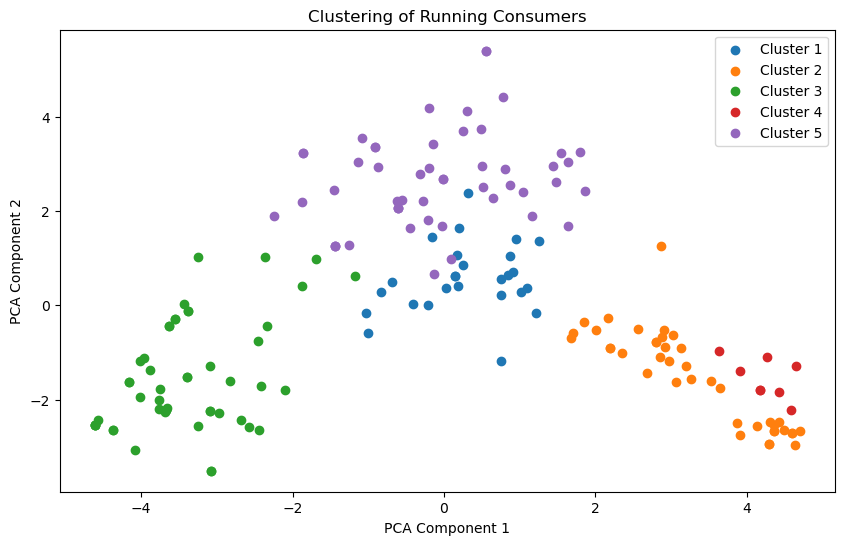

In [14]:
# Plot the clustered data
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['pca1'], cluster_data['pca2'], label=f'Cluster {cluster + 1}')

plt.title('Clustering of Running Consumers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

## PCA and K-means Clustering Analysis of Running Consumers

### Cluster Descriptions:

1. **Cluster 1:**
   - Low values in both PCA Component 1 and PCA Component 2.
   - Characteristics: Consumers with low consumption volumes, sensitive to price increases.

2. **Cluster 2:**
   - Intermediate values in both PCA Component 1 and PCA Component 2.
   - Characteristics: Consumers with moderate consumption volumes, exhibiting intermediate sensitivity to price increases.

3. **Cluster 3:**
   - High values in PCA Component 1 and low values in PCA Component 2.
   - Characteristics: Consumers with high consumption volumes, relatively insensitive to price increases.

4. **Cluster 4:**
   - High values in both PCA Component 1 and PCA Component 2.
   - Characteristics: Consumers with high consumption volumes, very sensitive to price increases.

5. **Cluster 5:**
   - Low values in PCA Component 1 and high values in PCA Component 2.
   - Characteristics: Consumers with low consumption volumes, very sensitive to price increases.

### Insights and Further Analysis:

The identified clusters provide a basis for understanding distinct behavioral patterns among running consumers. These clusters can be utilized for further analysis, such as investigating the impact of different marketing strategies on these consumer groups. Tailoring marketing strategies ba


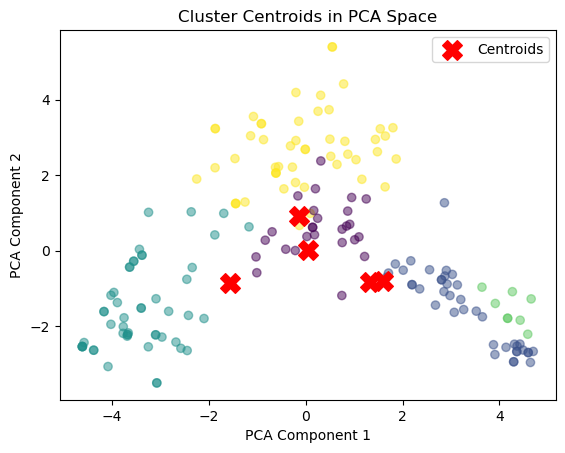

In [15]:
# Cluster Centroid Visualization
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
pca_centroids = pca.transform(centroids)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('Cluster Centroids in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

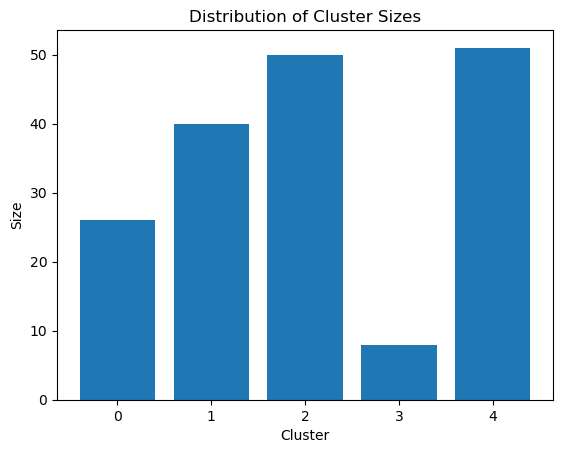

In [16]:
# Cluster Size Distribution
plt.bar(df['cluster'].value_counts().index, df['cluster'].value_counts().values)
plt.title('Distribution of Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Size')
plt.show()

In [17]:
# Analyze the characteristics of each cluster
cluster_means = df.groupby('cluster').mean()
print(cluster_means)

             record            id  United States  United Kingdom     Japan  \
cluster                                                                      
0         85.500000  5.816814e+06       0.192308        0.230769  0.076923   
1        108.475000  4.232808e+06       0.650000        0.075000  0.275000   
2         89.500000  5.650570e+06       0.740000        0.140000  0.120000   
3         72.500000  5.449206e+06       0.375000        0.625000  0.000000   
4         74.176471  5.395989e+06       0.627451        0.196078  0.176471   

            Valid  Invalid      Male    Female  Under 18  ...  \
cluster                                                   ...   
0        0.076923      1.0  0.038462  0.115385  0.153846  ...   
1        1.000000      0.0  0.425000  0.575000  0.000000  ...   
2        1.000000      0.0  0.520000  0.480000  0.660000  ...   
3        1.000000      0.0  1.000000  0.000000  0.000000  ...   
4        1.000000      0.0  0.431373  0.568627  0.000000  ...  

In [18]:
# Calculate similarity metrics for each cluster
euclidean_cluster_similarity = [euclidean_distances(scaled_data[df[df['cluster'] == c].index]).mean() for c in range(optimal_k)]
cosine_cluster_similarity = [cosine_similarity(scaled_data[df[df['cluster'] == c].index]).mean() for c in range(optimal_k)]

In [19]:
# Output the similarity metrics for each cluster
for c in range(optimal_k):
    print(f"Euclidean Similarity Metric for Cluster {c + 1}: {euclidean_cluster_similarity[c]}")
    print(f"Cosine Similarity Metric for Cluster {c + 1}: {cosine_cluster_similarity[c]}")

Euclidean Similarity Metric for Cluster 1: 7.791880281330481
Cosine Similarity Metric for Cluster 1: 0.41524721867318265
Euclidean Similarity Metric for Cluster 2: 7.772762727116626
Cosine Similarity Metric for Cluster 2: 0.33596821711004315
Euclidean Similarity Metric for Cluster 3: 6.238150649281498
Cosine Similarity Metric for Cluster 3: 0.4166491275519151
Euclidean Similarity Metric for Cluster 4: 5.525535268578794
Cosine Similarity Metric for Cluster 4: 0.7034419465873987
Euclidean Similarity Metric for Cluster 5: 8.103766103477295
Cosine Similarity Metric for Cluster 5: 0.21022731210234702


In [20]:
#Customer Segmentation Analysis

segmentation_analysis = df.groupby('cluster').agg({
    'United States': 'mean',
    'United Kingdom': 'mean',
    'Japan': 'mean',
    'Male': 'mean',
    'Female': 'mean',
    'Under 18': 'mean',
    '18-24': 'mean',
    '25-34': 'mean',
    '35-44': 'mean',
    '45-54': 'mean',
    'Above 55': 'mean',
    'Occasionally when the weather is nice.': 'mean',
    'Fairly regularly around 3-4 times a week.': 'mean',
    'Generally 5+ times a week.': 'mean',
    'A single pair that I use to go running in and also use for other activities.': 'mean',
    '1 pair of running shoes that I only use to run in.': 'mean',
    '3+ pairs of running shoes, some that I use for training and others that I use to race.': 'mean',
    '5+ pairs of running shoes depending on the type of training and racing that I\'m doing.': 'mean',
    'I\'m not sure': 'mean',
    'Foam': 'mean',
    'Rubber': 'mean',
    'Blend of foam & rubber': 'mean',
    'I don\'t run races': 'mean',
    'I use the same shoes I train in to run races': 'mean',
    'Rubber': 'mean',
    'Foam': 'mean',
    'Carbon Plate': 'mean',
    'Activities like yoga and pilates': 'mean',
    'Nothing outside of running': 'mean',
    'Spinning': 'mean',
    'Strength conditioning like lifting': 'mean',
    'Swimming': 'mean',
    'Hiking': 'mean',
    'I have no complaints!': 'mean',
    'They wear out too fast and I\'m always having to buy new ones.': 'mean',
    'They feel too narrow for my feet.': 'mean',
    'They are too heavy.': 'mean',
    'They feel great but don\'t feel fashionable.': 'mean',
    'Anything bright & bold': 'mean',
    'Soft pastels - pink, coral, purple': 'mean',
    'Earth tones - greens, yellows, browns': 'mean',
    'Neutrals - black & white': 'mean',
    'Something normal, no strong preference': 'mean'
})
print(segmentation_analysis)

         United States  United Kingdom     Japan      Male    Female  \
cluster                                                                
0             0.192308        0.230769  0.076923  0.038462  0.115385   
1             0.650000        0.075000  0.275000  0.425000  0.575000   
2             0.740000        0.140000  0.120000  0.520000  0.480000   
3             0.375000        0.625000  0.000000  1.000000  0.000000   
4             0.627451        0.196078  0.176471  0.431373  0.568627   

         Under 18     18-24     25-34     35-44     45-54  ...  \
cluster                                                    ...   
0        0.153846  0.115385  0.076923  0.038462  0.038462  ...   
1        0.000000  0.100000  0.600000  0.075000  0.125000  ...   
2        0.660000  0.260000  0.000000  0.080000  0.000000  ...   
3        0.000000  0.000000  1.000000  0.000000  0.000000  ...   
4        0.000000  0.098039  0.098039  0.607843  0.196078  ...   

         I have no complaints!  

we can observe the following results:
## ***Recommendations***
- There are 5 distinct clusters of consumers, labelled as 0, 1, 2, 3, and 4.
- Each cluster represents a segment of consumers with similar behavior patterns, including the average number of sales and preferences for products.

Here are some recommendations for the company based on these results:

1. **Product Portfolio Strategy:**
   - Tailor the product portfolio to each segment of consumers, ensuring that the products cater to their unique needs and preferences. This can lead to increased customer satisfaction and retention.

2. **Marketing Strategies:**
   - Implement targeted marketing campaigns for each segment of consumers. This involves analyzing their demographics, psychographics, and other relevant information to design personalized marketing campaigns that cater to their preferences and needs.

3. **Personalized Approach:**
   - The company can adopt a personalized approach by using the insights from the clustering analysis to develop personalized product recommendations and promotional offers for each segment of consumers. This can help in building stronger customer relationships and improving customer lifetime value.

To conclude, by identifying these consumer segments, the company can adopt a **data-driven approach** to tailor its product portfolio, marketing strategies, and customer engagement strategy to maximize revenue and customer satisfaction.
